In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [4]:
import os 

In [6]:
os.chdir(r"C:\Users\vbaburao\Documents\covid") 

In [11]:
os.getcwd()

'C:\\Users\\vbaburao\\Documents\\covid'

In [93]:
# Importing the dataset
data = pd.read_csv('munic_compilado_2019_final1.csv')
print(data.shape)
data.head()

(357, 15)


,Municipio ID,Municipio,State,Store_count,LON,LAT,Population density,AREA_KM2,AREA_URBANA_KM2,AREA_RURAL_KM2,POP_TOTAL,POP_URBANA,POP_RURAL,No of infection,Infection rate
0,1,ABAETETUBA,PA,1,-48.88,-1.72,97.54,1617.81,18.25,1599.55,157798.0,93928.0,63870.0,0.0,1.0
1,2,ADAMANTINA,SP,1,-51.07,-21.69,84.99,412.48,10.38,402.10,35057.0,33140.0,1917.0,0.0,1.0
2,3,ALAGOINHAS,BA,1,-38.42,-12.13,200.55,755.31,55.61,699.70,151475.0,132697.0,18778.0,0.0,1.0
3,4,ALFENAS,MG,1,-45.95,-21.43,93.57,852.74,53.82,798.92,79789.0,74860.0,4929.0,0.0,1.0
4,5,AMERICANA,SP,7,-47.33,-22.74,1788.32,134.25,91.11,43.14,240079.0,238977.0,1102.0,0.0,1.0


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 15 columns):
Municipio ID          357 non-null int64
Municipio             357 non-null object
State                 357 non-null object
Store_count           357 non-null int64
LON                   357 non-null object
LAT                   357 non-null object
Population density    357 non-null float64
AREA_KM2              357 non-null float64
AREA_URBANA_KM2       357 non-null float64
AREA_RURAL_KM2        357 non-null float64
POP_TOTAL             357 non-null float64
POP_URBANA            357 non-null float64
POP_RURAL             357 non-null float64
No of infection       357 non-null float64
Infection rate        357 non-null float64
dtypes: float64(9), int64(2), object(4)
memory usage: 42.0+ KB


In [101]:
data['LON'] = pd.to_numeric(data['LON'],errors='coerce')
data['LAT'] = pd.to_numeric(data['LAT'],errors='coerce')

In [102]:
data.dtypes

Municipio ID            int64
Municipio              object
State                  object
Store_count             int64
LON                   float64
LAT                   float64
Population density    float64
AREA_KM2              float64
AREA_URBANA_KM2       float64
AREA_RURAL_KM2        float64
POP_TOTAL             float64
POP_URBANA            float64
POP_RURAL             float64
No of infection       float64
Infection rate        float64
dtype: object

In [88]:
data.head()

,Municipio ID,Municipio,State,Store_count,LON,LAT,Population density,AREA_KM2,AREA_URBANA_KM2,AREA_RURAL_KM2,POP_TOTAL,POP_URBANA,POP_RURAL,No of infection,Infection rate
0,1,ABAETETUBA,PA,1,-48.88440382,-1.723469863,97.54,1617.81,18.25,1599.55,157798,93928,63870,0,1
1,2,ADAMANTINA,SP,1,-51.07336475,-21.68831148,84.99,412.48,10.38,402.10,35057,33140,1917,0,1
2,3,ALAGOINHAS,BA,1,-38.42261577,-12.13418259,200.55,755.31,55.61,699.70,151475,132697,18778,0,1
3,4,ALFENAS,MG,1,-45.9489182,-21.42817812,93.57,852.74,53.82,798.92,79789,74860,4929,0,1
4,5,AMERICANA,SP,7,-47.33036293,-22.7408835,1788.32,134.25,91.11,43.14,240079,238977,1102,0,1


In [90]:
data.drop("Municipio ID",axis=1)

,Municipio,State,Store_count,LON,LAT,Population density,AREA_KM2,AREA_URBANA_KM2,AREA_RURAL_KM2,POP_TOTAL,POP_URBANA,POP_RURAL,No of infection,Infection rate
0,ABAETETUBA,PA,1,-48.88440382,-1.723469863,97.54,1617.81,18.25,1599.55,157798,93928,63870,0,1
1,ADAMANTINA,SP,1,-51.07336475,-21.68831148,84.99,412.48,10.38,402.10,35057,33140,1917,0,1
2,ALAGOINHAS,BA,1,-38.42261577,-12.13418259,200.55,755.31,55.61,699.70,151475,132697,18778,0,1
3,ALFENAS,MG,1,-45.9489182,-21.42817812,93.57,852.74,53.82,798.92,79789,74860,4929,0,1
4,AMERICANA,SP,7,-47.33036293,-22.7408835,1788.32,134.25,91.11,43.14,240079,238977,1102,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,VITORIA DA CONQUISTA,BA,3,-40.83980954,-14.84800481,101.55,3368.91,286.35,3082.56,342106,306618,35488,0,1
353,VITORIA DE SANTO ANTAO,PE,1,-35.29386424,-8.118748,370.23,374.21,30.59,343.62,138543,121107,17436,0,1
354,VOLTA REDONDA,RJ,4,-44.09352188,-22.5099676,1494.04,182.94,132.50,50.44,273323,273206,117,0,1
355,VOTORANTIM,SP,3,-47.44973806,-23.54187121,665.14,184.49,28.62,155.86,122710,118095,4615,0,1


In [38]:
from sklearn import preprocessing

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [39]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.006459,0.082545,0.009145,0.082488,0.010442,0.005666,0.601311,0.0
1,0.002809,0.000000,0.005575,0.020456,0.002068,0.020736,0.000406,0.000655,0.018048,0.0
2,0.005618,0.000000,0.013713,0.038116,0.042741,0.036083,0.009925,0.008863,0.176787,0.0
3,0.008427,0.000000,0.006179,0.043135,0.041131,0.041200,0.004063,0.004094,0.046405,0.0
4,0.011236,0.012526,0.125532,0.006124,0.074664,0.002225,0.017169,0.017625,0.010375,0.0


In [49]:
df.to_excel("normalized.xlsx")

In [108]:
# Getting the values and plotting it

f3=data["No of infection"].values
f3=map(float,f3)
f4=data["Population density"].values

X = np.array(list(zip(f3,f4))
plt.scatter(f2,f3, c='black', s=5)


SyntaxError: invalid syntax (<ipython-input-108-ee206ccca35a>, line 8)

In [65]:
from sklearn.cluster import KMeans
X=data.values
kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.62733333e+02 3.02666667e+01 3.50561467e+03 1.62706467e+03
  4.37947333e+02 1.18911667e+03 1.80965127e+06 1.79505933e+06
  1.45919333e+04 3.01333333e+01]
 [2.86500000e+02 2.82000000e+02 6.80773000e+03 1.36392000e+03
  8.93075000e+02 4.70845000e+02 9.48350050e+06 9.43039150e+06
  5.31090000e+04 4.00000000e+00]
 [1.79085294e+02 3.20588235e+00 8.77463765e+02 1.18552050e+03
  9.95903235e+01 1.08676703e+03 2.02401012e+05 1.93691556e+05
  8.70945588e+03 1.68823529e+00]]


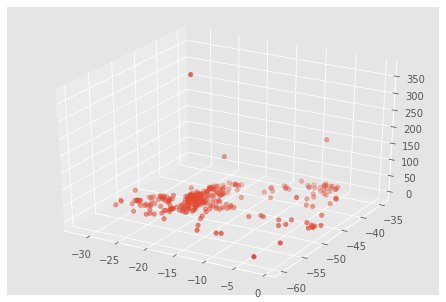

In [107]:
from mpl_toolkits.mplot3d import Axes3D
f2 = data["LON"].values
f2=map(float,f2)
f1=data["LAT"].values
f1=map(float,f1)
f3=data["No of infection"].values
f3=map(float,f3)
f4=data["Population density"].values


X = np.array(list(zip(f1, f2,f3)))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1],X[:,2])

In [83]:
X

array([[1.57798e+05, 1.61781e+03, 0.00000e+00],
       [3.50570e+04, 4.12480e+02, 0.00000e+00],
       [1.51475e+05, 7.55310e+02, 0.00000e+00],
       ...,
       [2.73323e+05, 1.82940e+02, 0.00000e+00],
       [1.22710e+05, 1.84490e+02, 0.00000e+00],
       [9.45640e+04, 4.22230e+02, 0.00000e+00]])